In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

In [2]:
import julia
julia.install()
from julia.api import Julia
jl = Julia(compiled_modules=False)
from julia import Main
from julia import ITensors

Main.include("../Quantum_cluster/src/julia_functions.jl")

The latest version of Julia in the `release` channel is 1.11.1+0.x64.linux.gnu. You currently have `1.10.3+0.x64.linux.gnu` installed. Run:

  juliaup update

in your terminal shell to install Julia 1.11.1+0.x64.linux.gnu and update the `release` channel to that version.
[ Info: Julia version info


Julia Version 1.10.3
Commit 0b4590a5507 (2024-04-30 10:59 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 20.04.6 LTS
  uname: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024 x86_64 x86_64
  CPU: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz: 
              speed         user         nice          sys         idle          irq
       #1  1800 MHz        531 s         42 s        136 s       3833 s          0 s
       #2  1800 MHz        629 s         13 s        114 s       3770 s          0 s
       #3  1669 MHz        608 s          6 s        107 s       3829 s          0 s
       #4  1800 MHz        593 s          6 s        130 s       3803 s          0 s
       #5  1800 MHz        586 s          6 s        115 s       3837 s          0 s
       #6  1800 MHz        627 s          7 s        114 s       3807 s          0 s
       #7  1800 MHz        483 s          3 s        111 s   

[ Info: Julia executable: /home/connorlenihan/.julia/juliaup/julia-1.10.3+0.x64.linux.gnu/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /bin/python3
│     libpython: /usr/lib/x86_64-linux-gnu/libpython3.8.so.1.0
│ Python:
│     python: /bin/python3
└     libpython: 
/home/connorlenihan/.local/lib/python3.8/site-packages/julia/juliainfo.py:93: UserWarning: julia warned:
The latest version of Julia in the `release` channel is 1.11.1+0.x64.linux.gnu. You currently have `1.10.3+0.x64.linux.gnu` installed. Run:

  juliaup update

in your terminal shell to install Julia 1.11.1+0.x64.linux.gnu and update the `release` channel to that version.
  warnings.warn("{} warned:\n{}".format(julia, stderr))


<PyCall.jlwrap get_SV_from_mps>

<Figure size 640x480 with 0 Axes>

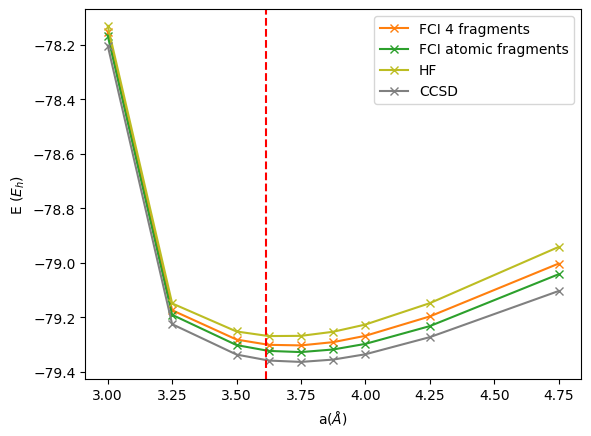

<Figure size 640x480 with 0 Axes>

In [2]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["2.0","2.25","2.5","2.75","3.0","3.25","3.5","3.625","3.75","3.875","4.0","4.25","4.75"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
fci_atom_list=[]

vqe_list=[]
vqe_err_list=[]
hf_list=[]

# for U_str in data_files_list:
#     data = pd.read_csv("BN_lat_con_"+str(U_str)+"_nshots_1000_dmet_bath.dat", sep="\s+")
#     print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("BN_lat_con_"+str(U_str)+"_nshots_1000_dmet_bath.dat" , sep="\s+")
    hf_mean=((data["HF"])).mean()
    ccsd_mean=((data["CCSD"])).mean()
    fci_atom_mean=((data["FCI_atom"])).mean()
    fci_mean=((data["FCI_emb"])).mean()
    data_real = (data["VQE_emb"].str.replace('i','j').apply(lambda x: np.real(complex(x))))
    vqe_mean=(data_real).mean()
    vqe_err=((data_real)).std()


    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    fci_atom_list.append(fci_atom_mean)
    fci_list.append(fci_mean)
    vqe_list.append(vqe_mean)
    vqe_err_list.append(vqe_err)
    

U_list=[float(x) for x in data_files_list][4:]    
# plt.errorbar(U_list,vqe_list[4:],vqe_err_list[4:],marker="x",capsize=2.5,label="VQE+CS 4 fragments") 
plt.plot(U_list,fci_list[4:],c="C1",marker="x",label="FCI 4 fragments")
plt.plot(U_list,fci_atom_list[4:],c="C2",marker="x",label="FCI atomic fragments")  
plt.plot(U_list,hf_list[4:],c="C8",marker="x",label="HF")  
plt.plot(U_list,ccsd_list[4:],c="grey",marker="x",label="CCSD")  
 
plt.xlabel(r"a($\AA$)")
plt.ylabel(r"E ($E_h$)")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.axvline(3.615,ls="--",color="red") 
plt.figure()

<Figure size 640x480 with 0 Axes>

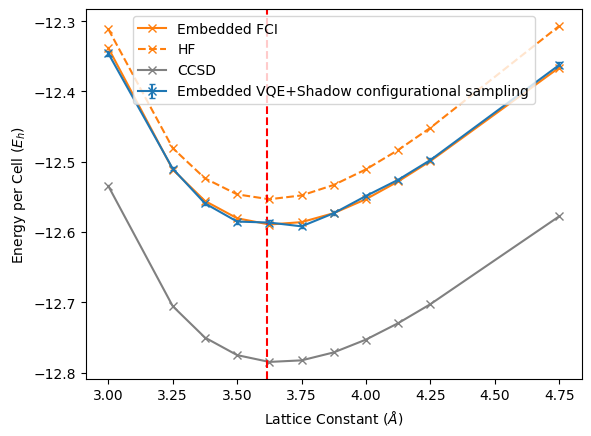

<Figure size 640x480 with 0 Axes>

In [10]:
#data_files_list222=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list222=["3.0","3.25","3.375","3.5","3.625","3.75","3.875","4.0","4.125","4.25","4.75"]#,"16.0"]
# ccsd_E_list222=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list222=[]
ccsd_list222=[]
fci_atom_list222=[]

vqe_list222=[]
vqe_err_list222=[]
hf_list222=[]

# for U_str in data_files_list222:
#     data = pd.read_csv("BN_lat_con_"+str(U_str)+"_nshots_1000_dmet_bath.dat", sep="\s+")
#     print(len(data["c0"]))
num_samples=8
samples_start = 12
for U_str in data_files_list222:
    data = pd.read_csv("BN_lat_con_"+U_str+"_nshots_4000_k_222_basis_gth-dzvp_dmet_bath.dat" , sep="\s+")
    hf_mean=((data["HF"])).mean()
    ccsd_mean=((data["CCSD"])).mean()
    fci_atom_mean=((data["FCI_atom"])).mean()
    fci_mean=((data["FCI_emb"])).mean()
    data_real = (data["VQE_emb"].str.replace('i','j').apply(lambda x: np.real(complex(x))))
    vqe_mean=(data_real[samples_start:samples_start+num_samples]).mean()
    vqe_err=((data_real[samples_start:samples_start+num_samples])).std()/np.sqrt(num_samples)


    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    ccsd_list222.append(ccsd_mean)
    hf_list222.append(hf_mean)
    fci_atom_list222.append(fci_atom_mean)
    fci_list222.append(fci_mean)
    vqe_list222.append(vqe_mean)
    vqe_err_list222.append(vqe_err)
    

U_list222=[float(x) for x in data_files_list222][:]    
plt.plot(U_list222,hf_list222[:],c="C1",marker="x",ls="--",label="HF")  
plt.errorbar(U_list222,vqe_list222[:],vqe_err_list222[:],marker="x",capsize=2.5,label="Embedded VQE+Shadow configurational sampling") 
plt.plot(U_list222,fci_list222[:],c="C1",marker="x",label="Embedded FCI")
# plt.plot(U_list222,fci_atom_list222[:],c="C2",marker="x",label="Embedded FCI atomic fragments")  

plt.plot(U_list222,ccsd_list222[:],c="grey",marker="x",label="Full system CCSD")  
 
plt.xlabel(r"Lattice Constant ($\AA$)")
plt.ylabel(r"Energy per Cell ($E_h$)")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.axvline(3.615,ls="--",color="red") 
plt.figure()

<Figure size 640x480 with 0 Axes>

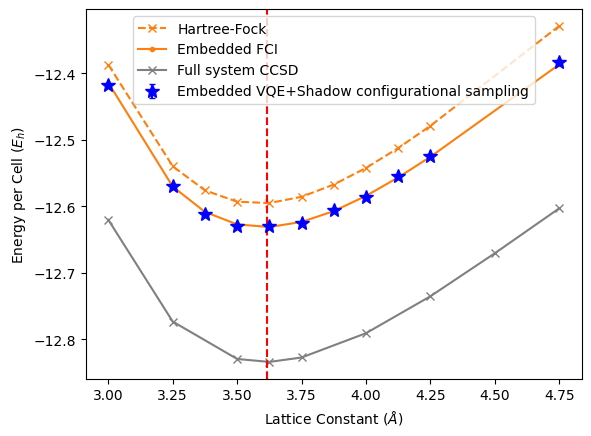

<Figure size 640x480 with 0 Axes>

In [16]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["3.0","3.25","3.375","3.5","3.625","3.75","3.875","4.0","4.125","4.25","4.75"]#["3.0","3.25","3.5","3.75","4.0","4.25","4.5","4.75"]#
ccsd_data_files_list=["3.0","3.25","3.5","3.625","3.75","4.0","4.25","4.5","4.75"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
fci_atom_list=[]

vqe_list=[]
vqe_err_list=[]
hf_list=[]

# for U_str in data_files_list:
#     data = pd.read_csv("BN_lat_con_"+str(U_str)+"_nshots_1000_dmet_bath.dat", sep="\s+")
#     print(len(data["c0"]))]

num_samples=10
samples_start=20
for U_str in data_files_list:
    data = pd.read_csv("BN_lat_con_"+U_str+"_nshots_4000_k_333_basis_gth-dzvp_dmet_bath_no_ccsd.dat" , sep="\s+")
    hf_mean=((data["HF"])).mean()
    # ccsd_mean=((data["CCSD"])).mean()
    fci_atom_mean=((data["FCI_atom"])).mean()
    fci_mean=((data["FCI_emb"])).mean()
    data_real = (data["VQE_emb"].str.replace('i','j').apply(lambda x: np.real(complex(x))))
    vqe_mean=(data_real[samples_start:samples_start+num_samples]).mean()
    vqe_err=((data_real[samples_start:samples_start+num_samples])).std()/np.sqrt(num_samples)


    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    # ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    fci_atom_list.append(fci_atom_mean)
    fci_list.append(fci_mean)
    vqe_list.append(vqe_mean)
    vqe_err_list.append(vqe_err)

for U_str in ccsd_data_files_list:
    data = pd.read_csv("BN_lat_con_"+U_str+"_nshots_4000_k_333_basis_gth-dzvp_dmet_bath.dat" , sep="\s+")    
    ccsd_mean=((data["CCSD"])).mean()
    ccsd_list.append(ccsd_mean)
U_list=[float(x) for x in data_files_list][:]    
ccsd_U_list=[float(x) for x in ccsd_data_files_list][:]    

plt.plot(U_list,hf_list[:],c="C1",ls="--",marker="x",label="Hartree-Fock")  
plt.plot(U_list,fci_list[:],c="C1",marker=".",label="Embedded FCI")
plt.errorbar(U_list,vqe_list[:],vqe_err_list[:],marker="*",markersize=10.0,ls="None",c="b",capsize=2.5,label="Embedded VQE+Shadow configurational sampling") 


# plt.plot(U_list,fci_atom_list[:],c="C2",marker="x",label="FCI atomic fragments")  

plt.plot(ccsd_U_list,ccsd_list[:],c="grey",marker="x",label="Full system CCSD")  
 
plt.xlabel(r"Lattice Constant ($\AA$)")
plt.ylabel(r"Energy per Cell ($E_h$)")
plt.legend()
#plt.ylim(-0.1,1.0)

plt.axvline(3.615,ls="--",color="red") 
# plt.savefig("../figures/BN_nshots_4000_k_333_basis_gth-dzvp_dmet_bath.png",bbox_inches="tight",dpi=500)

# plt.errorbar(U_list222,vqe_list222[:],vqe_err_list222[:],ls="--",marker=".",c="b",capsize=2.5,label="VQE+CS 4 fragments") 
# plt.plot(U_list222,fci_list222[:],c="C1",ls="--",marker=".",label="FCI 4 fragments")
# plt.plot(U_list222,fci_atom_list222[:],c="C2",ls="--",marker=".",label="FCI atomic fragments")  
# plt.plot(U_list222,hf_list222[:],c="C8",ls="--",marker=".",label="HF")  
# plt.plot(U_list222,ccsd_list222[:],c="grey",ls="--",marker=".",label="CCSD") 
plt.figure()

<Figure size 640x480 with 0 Axes>

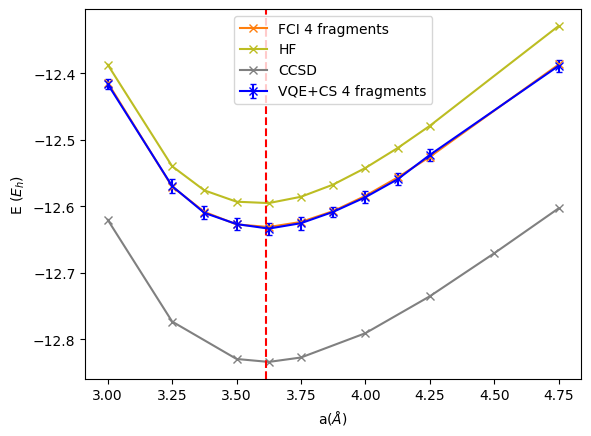

<Figure size 640x480 with 0 Axes>

In [1]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["3.0","3.25","3.375","3.5","3.625","3.75","3.875","4.0","4.125","4.25","4.75"]#["3.0","3.25","3.5","3.75","4.0","4.25","4.5","4.75"]#
ccsd_data_files_list=["3.0","3.25","3.5","3.625","3.75","4.0","4.25","4.5","4.75"]
dem_part_data_files_list=["3.0","3.125","3.25","3.375","3.5","3.625","3.75","3.875","4.0","4.125","4.25","4.375","4.5"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
fci_atom_list=[]

vqe_list=[]
vqe_err_list=[]
vqe_first_list=[]
hf_list=[]

dem_part_list=[]
atom_dem_part_list=[]
cumul_list=[]
atom_cumul_list=[]
# for U_str in data_files_list:
#     data = pd.read_csv("BN_lat_con_"+str(U_str)+"_nshots_1000_dmet_bath.dat", sep="\s+")
#     print(len(data["c0"]))
for U_str in data_files_list:
    data = pd.read_csv("BN_lat_con_"+U_str+"_nshots_4000_k_333_basis_gth-dzvp_dmet_bath_no_ccsd.dat" , sep="\s+")
    hf_mean=((data["HF"])).mean()
    # ccsd_mean=((data["CCSD"])).mean()
    fci_atom_mean=((data["FCI_atom"])).mean()
    fci_mean=((data["FCI_emb"])).mean()
    data_real = (data["VQE_emb"].str.replace('i','j').apply(lambda x: np.real(complex(x))))
    vqe_first = data_real[1]
    vqe_mean=(data_real).mean()
    vqe_err=((data_real)).std()


    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    # ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    fci_atom_list.append(fci_atom_mean)
    fci_list.append(fci_mean)
    vqe_list.append(vqe_mean)
    vqe_err_list.append(vqe_err)
    vqe_first_list.append(vqe_first)

for U_str in ccsd_data_files_list:
    data = pd.read_csv("BN_lat_con_"+U_str+"_nshots_4000_k_333_basis_gth-dzvp_dmet_bath.dat" , sep="\s+")    
    ccsd_mean=((data["CCSD"])).mean()
    ccsd_list.append(ccsd_mean)

# for U_str in dem_part_data_files_list:
data = pd.read_csv("BN_rdm_wf_nshots_1000_k_333_basis_gth-dzvp_dmet_bath_rdm_no_ccsd.dat" , sep="\s+")    
dem_part_list=list(((data["FCI_emb_rdm_cp"])))
# cumul_mean=((data["FCI_cumul"])).mean()
# atom_dem_part_mean=((data["FCI_atom_dem_part"])).mean()
# atom_cumul_mean=((data["FCI_atom_cumul"])).mean()
# dem_part_list.append(dem_part_mean)    
# atom_dem_part_list.append(atom_dem_part_mean)  
# cumul_list.append(cumul_mean)    
# atom_cumul_list.append(atom_cumul_mean)    
# print(dem_part_list)

data = pd.read_csv("BN_rdm_wf_nshots_1000_k_333_basis_gth-dzvp_mp2_thresh_0.001_bath_rdm_no_ccsd.dat" , sep="\s+")    
dem_part_list_th=list(((data["FCI_emb_rdm_cp"])))


U_list=[float(x) for x in data_files_list][:]    
ccsd_U_list=[float(x) for x in ccsd_data_files_list][:]    
dem_U_list=[float(x) for x in dem_part_data_files_list][:]    
plt.errorbar(U_list,vqe_list[:],vqe_err_list[:],marker="x",c="b",capsize=2.5,label="VQE+CS 4 fragments") 
plt.plot(U_list,fci_list[:],c="C1",marker="x",label="FCI 4 fragments")
# plt.plot(U_list,fci_atom_list[:],c="C2",marker="x",label="FCI atomic fragments")  
plt.plot(U_list,hf_list[:],c="C8",marker="x",label="HF")  
plt.plot(ccsd_U_list,ccsd_list[:],c="grey",marker="x",label="CCSD")  
# plt.plot(dem_U_list,dem_part_list,"C3",marker="x",label="FCI 4 frag dem part")
# plt.plot(dem_U_list,atom_dem_part_list,"C4",marker="x",label="FCI atomic frag dem part")
# plt.plot(dem_U_list,cumul_list,"C5",marker="x",label="FCI 4 frag cumulant")
# plt.plot(dem_U_list,atom_cumul_list,"C6",marker="x",label="FCI atomic frag cumulant")
 
plt.xlabel(r"a($\AA$)")
plt.ylabel(r"E ($E_h$)")
plt.legend()
#plt.ylim(-0.1,1.0)

plt.axvline(3.615,ls="--",color="red") 
# plt.savefig("../figures/BN_nshots_4000_k_333_basis_gth-dzvp_dmet_bath_w_dem_part.png",bbox_inches="tight",dpi=500)

# plt.errorbar(U_list222,vqe_list222[:],vqe_err_list222[:],ls="--",marker=".",c="b",capsize=2.5,label="VQE+CS 4 fragments") 
# plt.plot(U_list222,fci_list222[:],c="C1",ls="--",marker=".",label="FCI 4 fragments")
# plt.plot(U_list222,fci_atom_list222[:],c="C2",ls="--",marker=".",label="FCI atomic fragments")  
# plt.plot(U_list222,hf_list222[:],c="C8",ls="--",marker=".",label="HF")  
# plt.plot(U_list222,ccsd_list222[:],c="grey",ls="--",marker=".",label="CCSD") 
plt.figure()

In [28]:
# fit_results = Main.fit_Murnaghan([abs(np.linalg.det([[a / 2, a / 2, 0], [0, a / 2, a / 2], [a / 2, 0, a / 2]])) for a in x_list],fci_atom_list,72.,0.05,1.0,-12.0)
data_files_list=["3.0","3.25","3.375","3.5","3.625","3.75","3.875","4.0","4.125","4.25","4.75"]

from scipy.optimize import curve_fit
from decimal import Decimal
def murnaghan_eqn(v,v0,k0,k0_p,e0):    
    x, y = k0_p - 1, (v / v0)**(1.-k0_p)
    return e0 + (k0*v0)*((1/(k0_p*x))*y + v/(v0*k0_p)  - (1 / x))

bulk_mod_list=[]
for n in range(1):
    vqe_first_list=[]
    for U_str in data_files_list:
        data = pd.read_csv("BN_lat_con_"+U_str+"_nshots_4000_k_333_basis_gth-dzvp_dmet_bath_no_ccsd.dat" , sep="\s+")
        data_real = (data["VQE_emb"].str.replace('i','j').apply(lambda x: np.real(complex(x))))
        vqe_first = data_real[n]
        vqe_first_list.append(vqe_first)



    fit_list = vqe_list[1:-3]
    x_list = U_list[1:-3]

    popt, pcov = curve_fit(murnaghan_eqn,[abs(np.linalg.det([[a / 2, a / 2, 0], [0, a / 2, a / 2], [a / 2, 0, a / 2]])) for a in x_list],fit_list,p0=[72.,0.05,2.,0])
    # print(fit_results)
    # print(popt)
    # print("{:.2E}".format(Decimal(((4.3597447222060e-18)/(1e-30))*popt[1])),(4.3597447222060e-18)/(1e-30)*popt[1] + 101325*popt[2])
    bulk_mod_list.append(((4.3597447222060e-18)/(1e-30))*popt[1])
    # print((popt[0]/)**(1./3.))
    # plt.plot([abs(np.linalg.det([[a / 2, a / 2, 0], [0, a / 2, a / 2], [a / 2, 0, a / 2]])) for a in np.arange(x_list[0],x_list[-1],0.01)], murnaghan_eqn(np.array([abs(np.linalg.det([[a / 2, a / 2, 0], [0, a / 2, a / 2], [a / 2, 0, a / 2]])) for a in np.arange(x_list[0],x_list[-1],0.01)]), *popt))
    # plt.plot([abs(np.linalg.det([[a / 2, a / 2, 0], [0, a / 2, a / 2], [a / 2, 0, a / 2]])) for a in x_list],fit_list[:],c="C2",marker="x",label="data")  

print("mean,err: ","{:.2E}".format(Decimal(np.mean(bulk_mod_list)))+" Pa","   ","{:.2E}".format(Decimal(np.std(bulk_mod_list))))    

mean,err:  4.04E+11 Pa     0.00E+2


[6, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14]
0
0 

0
0 

0
2 

0
1 

0
1 

0
1 

1
1 

1
1 

1
1 



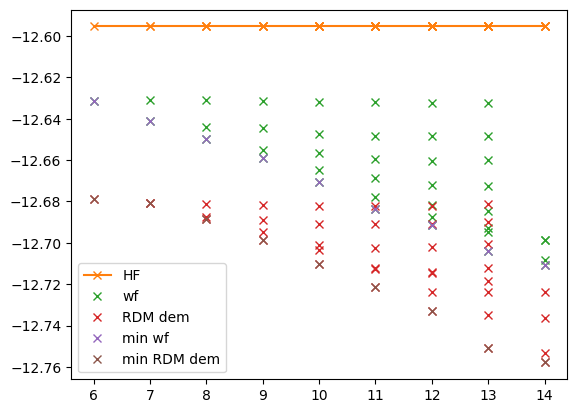

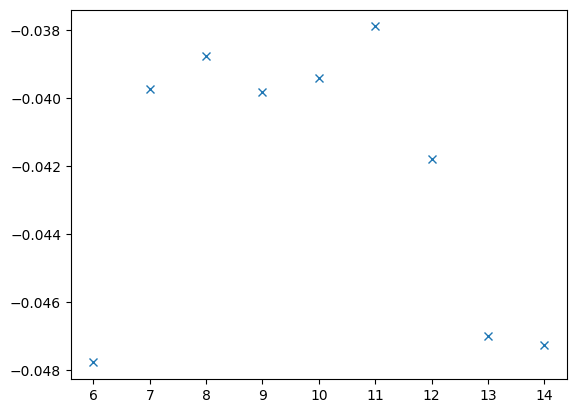

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

# data = pd.read_csv("BN_rdm_wf_distance_3.615_k_333_basis_gth-dzvp_mp2_trunc_number_bath_rdm_no_ccsd_no_rdm_cl_size.dat" , sep="\s+")
data = pd.read_csv("BN_rdm_wf_distance_3.615_k_333_basis_gth-dzvp_mp2_trunc_number_bath_rdm_no_ccsd.dat" , sep="\s+")
max_clusters = list(data["wf_max_cluster"])
HF_list = list(data["HF"])
FCI_wf_list = list(data["FCI_emb"])
FCI_dp_list= list(data["FCI_emb_rdm_cp"])
FCI_cumul_list= list(data["FCI_emb_cumul_cp"])

data = pd.read_csv("BN_rdm_wf_CCSD_solver_distance_3.615_k_333_basis_gth-dzvp_trunc_number_mp2_bath_rdm_no_ccsd.dat" , sep="\s+")
max_clusters = max_clusters + list(data["wf_max_cluster"])
HF_list = HF_list + list(data["HF"])
FCI_wf_list = FCI_wf_list + list(data["FCI_emb"])
FCI_dp_list = FCI_dp_list + list(data["FCI_emb_rdm_cp"])
FCI_cumul_list = FCI_cumul_list + list(data["FCI_emb_cumul_cp"])

print(list(max_clusters))
mins_FCI_wf_list=[]
mins_FCI_dp_list=[]
for max_cl_size in range(min(max_clusters),max(max_clusters)+1):
    indices = [i for i, x in enumerate(max_clusters) if x == max_cl_size] ###get all instances of max_cl_size in max_clusters
    mins_FCI_wf_list.append(min([FCI_wf_list[x] for x in indices]))
    print([FCI_wf_list[x] for x in indices].index(min([FCI_wf_list[x] for x in indices])))
    mins_FCI_dp_list.append(min([FCI_dp_list[x] for x in indices]))
    print([FCI_dp_list[x] for x in indices].index(min([FCI_dp_list[x] for x in indices])),"\n")

plt.plot(max_clusters,HF_list,marker="x",c="C1",label="HF")
plt.plot(max_clusters,FCI_wf_list,marker="x",c="C2",label="wf",ls="None")
plt.plot(max_clusters,FCI_dp_list,marker="x",c="C3",label="RDM dem",ls="None")
plt.plot(range(min(max_clusters),max(max_clusters)+1),mins_FCI_wf_list,marker="x",c="C4",label="min wf",ls="None")
plt.plot(range(min(max_clusters),max(max_clusters)+1),mins_FCI_dp_list,marker="x",c="C5",label="min RDM dem",ls="None")
# plt.plot(max_clusters,FCI_cumul_list,marker="x",c="C4",label="Cumul dem",ls="None")
plt.legend()
plt.figure()
diffs = [a_i - b_i for a_i, b_i in zip(mins_FCI_dp_list, mins_FCI_wf_list)]
plt.plot(range(min(max_clusters),max(max_clusters)+1),diffs,marker="x",ls="None")

In [33]:
import itertools

def pairsum(vals, target):
    return sorted([(a, b) for a, b in itertools.combinations(vals, 2) if a + b == target])

n=6
pairs = pairsum(range(n+1),n)
pairs_reverse = [(x[1],x[0]) for x in pairs]
pairs=pairs+pairs_reverse
if n%2 ==0:
    pairs.append((n//2,n//2))
for occ_vir_nums in pairs:
    n_occ = occ_vir_nums[0]
    n_vir = occ_vir_nums[1]
    print("n occ: ",n_occ)
    print("n vir: ",n_vir,"\n")
# print(pairs_reverse)

n occ:  0
n vir:  6 

n occ:  1
n vir:  5 

n occ:  2
n vir:  4 

n occ:  6
n vir:  0 

n occ:  5
n vir:  1 

n occ:  4
n vir:  2 

n occ:  3
n vir:  3 

